<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Portafolio_Fiduciaria_Bogota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns

# **Portafolio Diario**

In [1]:
from google.colab import files

files.upload()

Saving FIB Formato portafolio diario para envío 6..xlsx to FIB Formato portafolio diario para envío 6..xlsx


In [ ]:
FIB = pd.read_excel("/content/FIB Formato portafolio diario para envío 6..xlsx")

In [ ]:
FIB

In [378]:
Ultimo_Portafolio = FIB.loc[FIB['Fecha'] > "2022-04-11"] 

In [ ]:
Portafolio.tail() 

In [427]:
Composicion = pd.pivot_table(Ultimo_Portafolio, values='Valor Presente', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'FIC', 'No Tiene': 'AHORROS'}) \
    .drop(index=['Total']) \
    .style.format('{:,.2f}'.format)

In [ ]:
Composicion

In [ ]:
df = Composicion.data
# Calcular la columna de porcentajes
porcentajes = df.div(df.iloc[:,-1], axis=0).iloc[:,:-1]
porcentajes.columns = [str(col) for col in porcentajes.columns]
# Agregar la columna de porcentajes al DataFrame
df = pd.concat([df, porcentajes], axis=0)
Composicion = df.style.format('{:,.2f}'.format)
Composicion

In [ ]:
fig, ax = plt.subplots()
ax.pie(porcentajes.iloc[-1], labels=porcentajes.columns, autopct='%1.1f%%')
ax.set_title('Porcentajes')
plt.show()

# **Portafolio Historico**

In [ ]:
Composicion

In [ ]:
porcentajes.fillna(0, inplace=True)
porcentajes.plot()

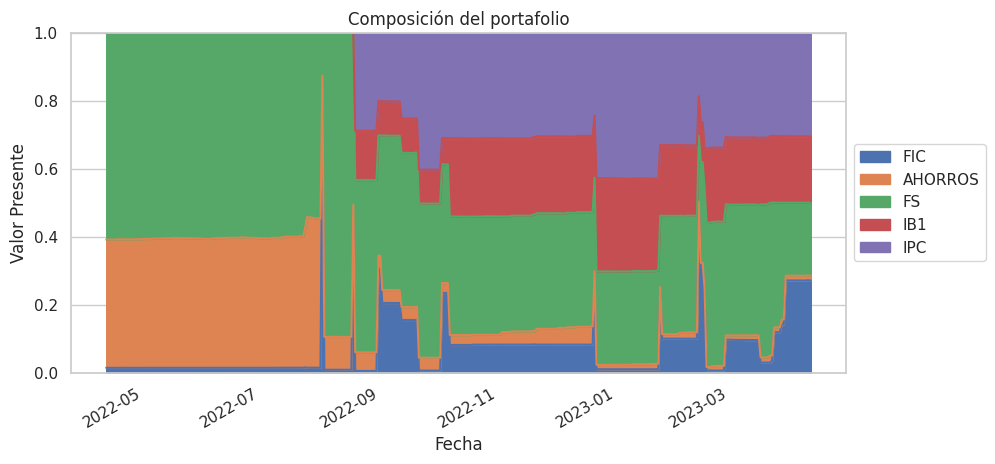

In [431]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='area', stacked=True, figsize=(10, 5), legend=True, ylim=[0, 1], y=['FIC','AHORROS',"FS","IB1","IPC"])

# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')

# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()